# Problem Sheet 3

## Bias-variance decomposition

## Task (a) (Warm-up)
Assume that $h_{\theta}(x) = \theta x$, and $(X,Y) \sim \mathbb{P}$, where $Y = \theta^{true} X + \xi$ for some fixed "ground truth" parameter $\theta^{true} \in \mathbb{R}$, and $\xi$ is a random variable independent of $X$ with $\mathbb{E}[\xi] = 0$ and $\mathrm{Var}(\xi)<\infty$. Let the dataset $D=\{(x_1,y_1),\ldots,(x_m,y_m)\}$ contain $m$ independent samples of $(X,Y)$. Assume quadratic pointwise loss, $\ell(y,\hat y) = (y-\hat y)^2.$
- Find the empirical risk minimizer $\theta^* = \arg\min_{\theta \in \mathbb{R}} L_{D}(\theta)$.
- Since data are sampled at random, the entire dataset $D$, and hence $\theta^*$ which depends only on $D$, can be also seen as realisations of random variables $\Delta$ and $\Theta^*$, respectively. Let $\mathbb{E}_{\Delta}$ denote the expectation with respect to the distribution of $\Delta$ only. Prove that $\mathbb{E}_{\Delta}[\Theta^*] = \theta^{true}$.

#### Solution:
The first part is the already known differentiation,
$$
L_D(\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta x_i - y_i)^2 = \frac{1}{m} \sum_{i=1}^{m} (\theta^2 x_i^2 - 2 \theta x_i y_i + y_i^2)
$$
$$
\frac{dL_D}{d\theta}(\theta^*) = \frac{2}{m} \theta^* \sum_{i=1}^m (x_i^2) - \frac{2}{m} \sum_{j=1}^m (x_j y_j) = 0
$$
$$
\theta^* = \frac{\sum_{j=1}^m x_j y_j}{\sum_{i=1}^m x_i^2} = \frac{\sum_{j=1}^m x_j^2 \theta^{true} + x_j \xi_j}{\sum_{i=1}^m x_i^2} = \theta^{true} + \sum_{j=1}^{m} \frac{x_j}{\sum_{i=1}^{m} x_i^2} \xi_j.
$$
For the second part, we turn $x_j$ and $\xi_j$ from $D$ into random variables from $\Delta$,
$$
\Theta^* = \theta^{true} + \sum_{j=1}^{m} \frac{X_j}{\sum_{i=1}^{m} X_i^2} \xi_j.
$$
Now since $X$ and $\xi$ are independent, so are $X_j$ and $\xi_j$, and we also have $\mathbb{E}_{\Delta}[\xi_j] = 0$. Thus,
$$
\mathbb{E}_{\Delta}[\Theta^*] = \theta^{true} + \sum_{j=1}^{m}\mathbb{E}_{\Delta}\left[\frac{X_j}{\sum_{i=1}^{m} X_i^2} \cdot \xi_j\right] = \theta^{true} + \sum_{j=1}^m \mathbb{E}_{\Delta}\left[\frac{X_j}{\sum_{i=1}^{m} X_i^2}\right] \cdot \underbrace{\mathbb{E}_{\Delta}\left[\xi_j\right]}_{=0} = \theta^{true}.
$$

## Task (b)
- In the assumptions of Task (a), **prove** that $\theta^{best} = \theta^{true}$, where $\theta^{best} = \mathbb{E}[XY]/\mathbb{E}[X^2]$ is the expected risk minimizer from Task (a) of Problem Sheet 2.
- Hence prove that $L_{bias} = L(\mathbb{E}_{\Delta}[\Theta^*])$

#### Solution
$$
\mathbb{E}[XY] = \mathbb{E}[X^2 \theta^{true} + X \xi] = \mathbb{E}[X^2] \theta^{true}
$$
by independence of $X$ and $\xi$, and the result follows. 
For the second part, $L_{bias} = \min_{\theta \in \mathbb{R}} L(\theta) = L(\theta^{best})$ by definition of $\theta^{best}$, but $\theta^{best} = \theta^{true} = \mathbb{E}_{\Delta}[\Theta^*]$ by Task (a).

## Task (c): why the variance loss is a variance
- In the assumptions of Task (a), **prove** that $\mathbb{E}_{\Delta} [L_{var}(\Theta^*)] = \mathrm{Var}_{\Delta}[\Theta^*] \mathbb{E}[X^2]$, where $\mathrm{Var}_{\Delta}$ is the variance with respect to the distribution of $\Delta$.

_Hint: start with adding and subtracting_ $\mathbb{E}_{\Delta}[\Theta^*]X$ under the loss, 
$$
L_{var}(\Theta^*) + L_{bias} = L(\Theta^*) = \mathbb{E}[(\Theta^* X - Y)^2] = \mathbb{E}[((\Theta^* X - \mathbb{E}_{\Delta}[\Theta^*]X) + (\mathbb{E}_{\Delta}[\Theta^*]X - Y))^2],
$$
_expand the square under the expectation, and finally take_ $\mathbb{E}_{\Delta}$ _of everything. Note that_ **precomputed** $\Delta$ _is independent of_ **new** $(X,Y)$.

#### Solution:
We can replace $\mathbb{E}_{\Delta}[\Theta^*] = \theta^{best}$, which allows us to separate into products involving independent $\Theta^*$ and $X$,
$$
L(\Theta^*) = (\Theta^* - \theta^{best})^2\mathbb{E}[X^2] + 2 (\Theta^* - \theta^{best}) \mathbb{E}[X (\Theta^{best} X - Y)] + L_{bias}.
$$
Taking the expectation over $\Delta$, we get $\mathbb{E}_{\Delta}[\Theta^* - \theta^{best}] = \mathbb{E}_{\Delta}[\Theta^* - \mathbb{E}_{\Delta}[\Theta^*]] = 0$ and $\mathbb{E}_{\Delta}[(\Theta^* - \theta^{best})^2] = \mathrm{Var}_{\Delta}[\Theta^*]$. Subtracting $L_{bias}$ from $\mathbb{E}_{\Delta}[L(\Theta^*)]$, we get the result.

---

## Task 0: simulating the "true" distribution
- **Copy** over the solution of Task 1 of Problem Sheet 2 (generation of synthetic data).

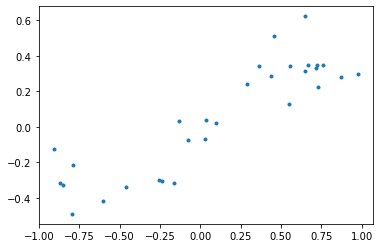

In [1]:
import numpy as np
from matplotlib import pyplot as plt    

def TrueSample():
    x = np.random.uniform(-1,1)
    y = x - x**3 + 0.1*np.random.randn()
    return x,y

Nsamples = 30
Y = np.zeros(Nsamples)
X = np.zeros(Nsamples)
for i in range(Y.size):
    X[i],Y[i] = TrueSample()

plt.plot(X,Y, '.')
plt.show()

## Task 1: K-fold cross validation
- **Copy** over functions `features`, `optimise_loss` and `split_data` from Problem Sheet 2.
- **Write a Python function** `cv(X,Y,K,n)` that takes as input arrays X and Y, the number of folds K, and the polynomial degree n, and computes the cross validation loss as follows:
 - create an integer array `ind` containing a random shuffle of the $0,\ldots,N-1$ index sequence, where $N$ is the size of X and Y.
 - for each $k=0,\ldots,K-1$,
   - let $X_{train}, Y_{train}, X_{test},Y_{test}$ be training and test arrays produced from `split_data` with K folds applied to shuffled arrays `X[ind]`, `Y[ind]`, such that $X_{test},Y_{test}$ are the $k$-th chunks of `X[ind]`, `Y[ind]`, respectively.
   - compute $\boldsymbol\theta^{(k)} = \arg\min_{\boldsymbol\theta\in\mathbb{R}^{n+1}}L_{D_{train}}(\boldsymbol\theta)$ using `features` to compute the Vandermonde matrix, and `optimise_loss` to solve the equations, defined by $D_{train} = (X_{train}, Y_{train})$.
   - compute the $k$-th test loss $L_k:=L_{D_{test}^{(k)}}(\boldsymbol\theta^{(k)})$, where $D_{test}^{(k)}:=(X_{test},Y_{test})$.
 - Return the cross validation loss $L_{cv} = \frac{1}{K} \sum_{k=0}^{K-1}L_k$   

In [2]:
def features(x,n):
    powers = np.arange(n+1)               # [0,1,2,...,n]
    powers = np.reshape(powers, (1, -1))  # Make it explicitly a row vector
    x = np.reshape(x, (-1, 1))            # Make it explicitly a column vector
    return x**powers                      # Python automatically broadcasts the vectors to each others' shapes 
                                          # and takes the power between the resulting matrices elementwise

def optimise_loss(V,y):
    return np.linalg.solve(V.T @ V, V.T @ y)

def split_data(X,Y,K,k):
    N = X.shape[0]
    test_range = range(k*N//K, (k+1)*N//K)
    Xtest = X[test_range]
    Xtrain = np.delete(X, test_range)
    Ytest = Y[test_range]
    Ytrain = np.delete(Y, test_range)
    return Xtrain, Ytrain, Xtest, Ytest

def cv(X,Y,K,n):
    ind = np.arange(X.size)
    np.random.shuffle(ind)
    L = np.zeros(K)
    for k in range(K):
        Xtrain,Ytrain,Xtest,Ytest = split_data(X[ind],Y[ind],K,k)
        V = features(Xtrain, n)
        theta_k = optimise_loss(V, Ytrain)
        V = features(Xtest, n)
        L[k] = np.mean((V @ theta_k - Ytest)**2)
    return np.mean(L)

## Task 2: model selection
- **Vary** $n$ from 0 to 8 and **plot** the $5$-fold cross validation loss for datasets created in Task 0 as a function of $n$.
- **Find** which value of $n$ gives the smallest cross validation loss. Can we expect this value if we know how the datasets were produced in Task 0?

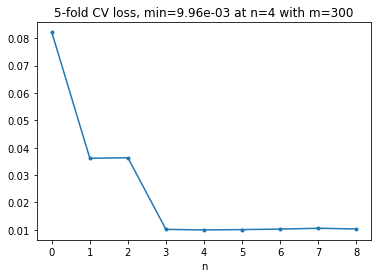

In [3]:
for Nsamples in [300]:
    Y = np.zeros(Nsamples)
    X = np.zeros(Nsamples)
    for i in range(Y.size):
        X[i],Y[i] = TrueSample()

    cvlosses = np.zeros(9)
    for n in range(cvlosses.size):
        cvlosses[n] = cv(X, Y, 5, n)
    plt.plot(np.arange(cvlosses.size), cvlosses, '.-')
    plt.xlabel("n")
    plt.title(f"5-fold CV loss, min={np.min(cvlosses):.2e} at n={np.argmin(cvlosses)} with m={Nsamples}")
    plt.show()

## Task 3: convergence of the cross validation loss
- **Vary** the number of samples in Task 0 in a range 30, 100, 300, 1000, 3000, and for each corresponding realisation of X and Y repeat the cross validation loss plotting in Task 2. What you observe as the number of samples gets larger?

#### Solution:
The CV loss should converge to values as above. Specifically, since the noiseless prediction rule is a cubic polynomial, the CV loss should reach the value of about 0.01 for any $n\ge 3$. The value of 0.01 is the variance of the noise $\frac{1}{10} \xi$, which is also the minimal expected loss $L_{bias}$ for $n \ge 3$.